In [53]:
import os

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

from glob import glob
import re


from pivpy import io, pivpy, graphics

# for the sake of this tutorial, ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [54]:
# the txt files are not "standard"
# data = io.load_directory(path_to_data,basename='pass*',ext='.txt')

In [55]:
path_to_data = os.path.abspath('../OpenPIV/Results/')
basename='pass*'
ext='.txt'

files  = sorted(glob(os.path.join(path_to_data,basename+ext)))

In [56]:
def find_rows_cols(filename):
    d = np.loadtxt(filename)
    return np.unique(d[:,1]).shape[0], np.unique(d[:,0]).shape[0]

# rows,cols = find_rows_cols(filename)

def read_txt(filename,rows=None,cols=None):
    d = np.loadtxt(filename)
    
    if ((rows is None) or (cols is None)):
        rows,cols = find_rows_cols(filename)

    x = d[:,0].reshape(rows, cols)
    y = d[:,1].reshape(rows, cols)
    u = d[:,2].reshape(rows, cols)
    v = d[:,3].reshape(rows, cols)
    chc = d[:,4].reshape(rows, cols)
    
    return x,y,u,v,chc


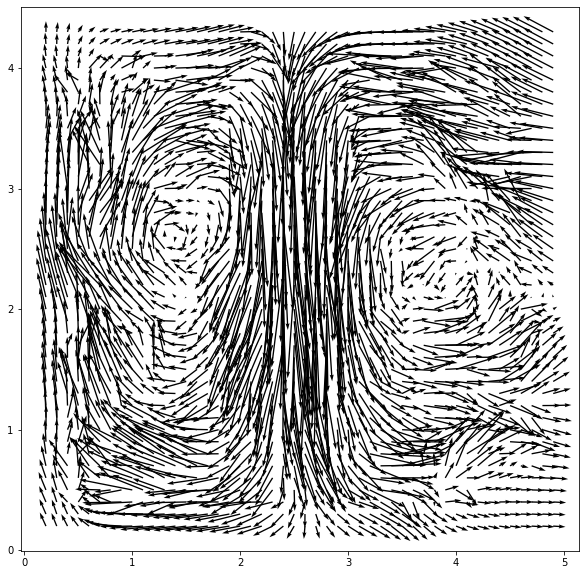

In [57]:
x,y,u,v,chc = read_txt(files[0])
plt.quiver(x,y,u,v,scale=0.5)

# note that large y is at the top and the flow is from top to bottom

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13403f5d0>)

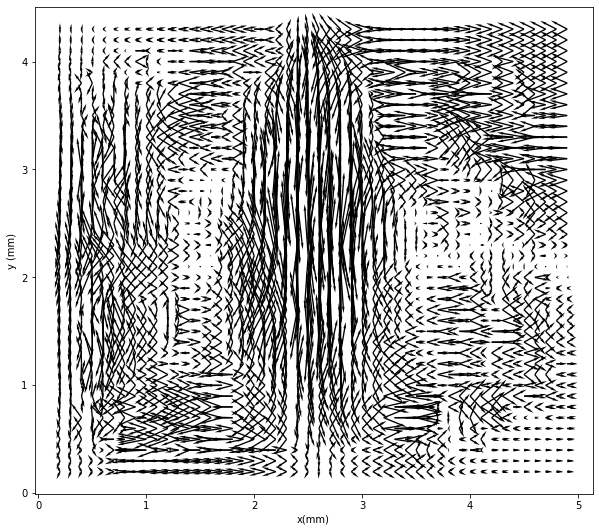

In [58]:
data = io.from_arrays(x,y,u,v,chc)
data.piv.quiver(arrScale=10)

# because we didn't set the length units, the quiver decides to flip the y-axis
data.attrs['units'] = ['mm','mm','m/s','m/s']
graphics.quiver(data,arrScale=10)

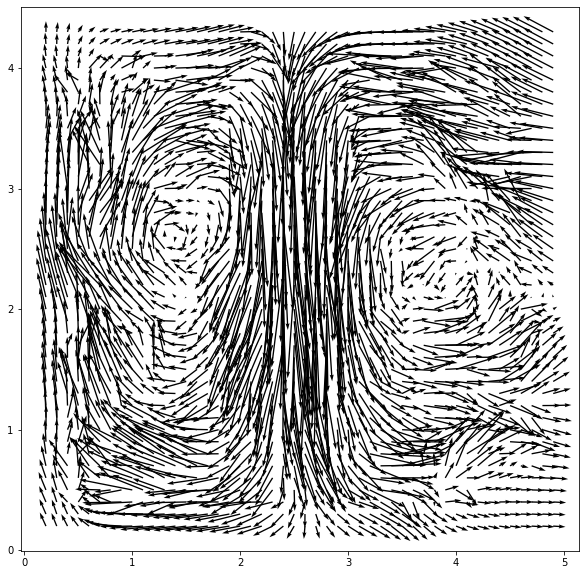

In [59]:
plt.quiver(data.x,data.y,data.u.values[:,:,0].T,data.v.values[:,:,0].T,scale=.5)

In [60]:
data = []
variables = ['x','y','u','v','chc'] # see below one file
units = ['mm','mm','m/s','m/s'] # just a guess
dt = 1 # guess

rows,cols = find_rows_cols(files[0])

for i,f in enumerate(files):
    temp = re.findall(r'\d+', os.path.basename(f)) 
    frame = list(map(int, temp))[0]
    x,y,u,v,chc = read_txt(f,rows,cols)
    data.append(io.from_arrays(x,y,u,v,chc))
    # variables,units,dt,frame

if len(data) > 0:
    combined = xr.concat(data, dim='t')
    combined.attrs['variables'] = variables
    combined.attrs['units'] = units
    combined.attrs['dt'] = dt
    combined.attrs['files'] = files

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x134daafd0>)

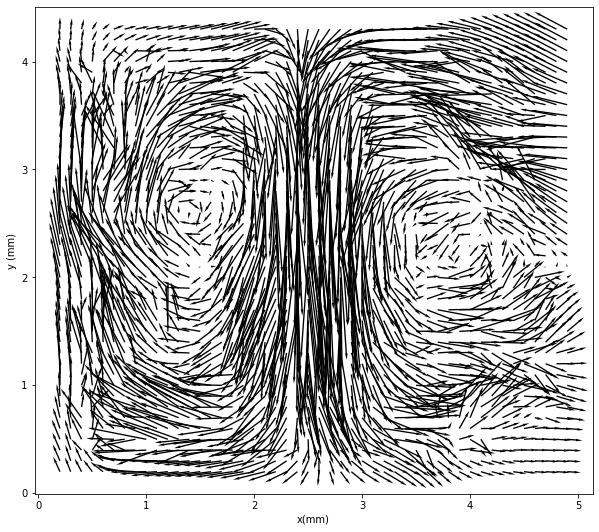

In [61]:
graphics.quiver(combined.isel(t=0),arrScale=5)
# plt.gca().invert_yaxis()

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1348f9a90>)

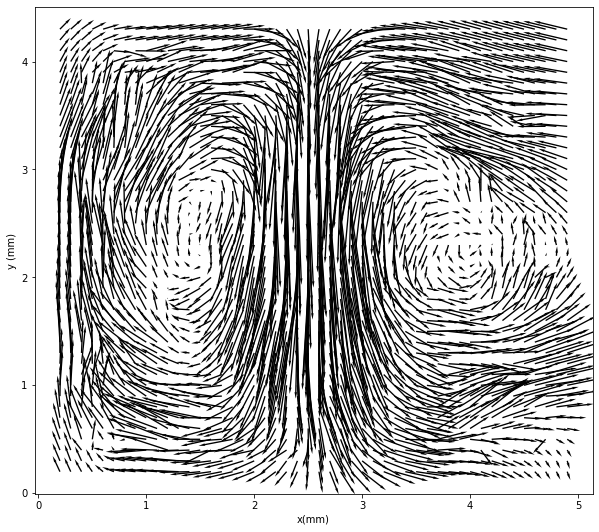

In [62]:
combined.piv.average.piv.quiver(arrScale=5)

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13698fad0>)

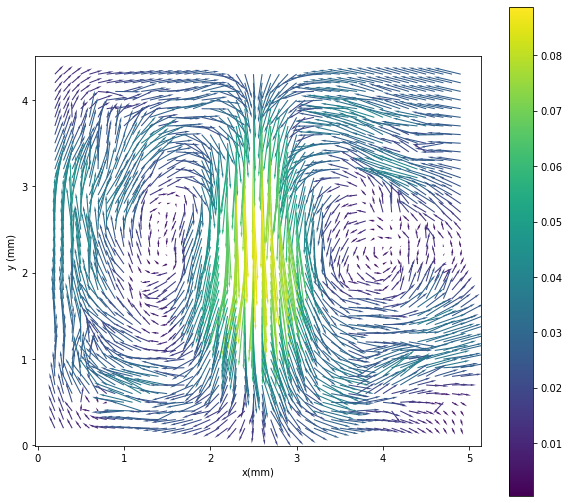

In [63]:
graphics.quiver(combined.piv.average,arrScale=5,colbar=True)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x137603750>)

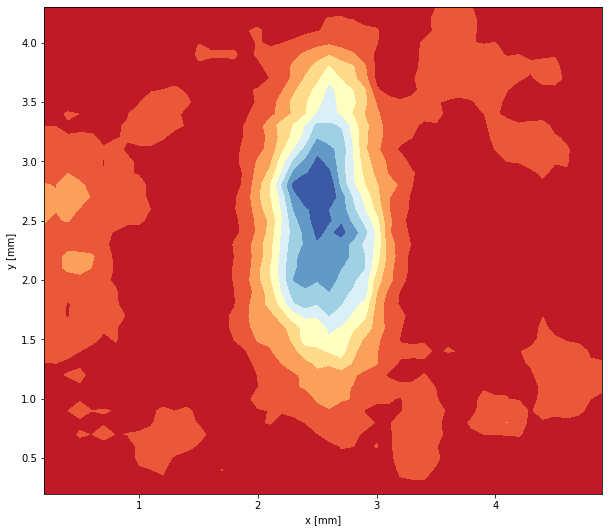

In [65]:
graphics.contour_plot(combined.piv.average)